In [0]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [0]:
def generate_dataset(N, noise_rate=0.2):
    # сгенирируем случайые параметры a_0 и a_1
    a = np.random.random(2) * 10 
    print(a)
    
    # сгенерируем таблицу входных данных
    X = np.random.random((N,2)) 
    
    # пусть z = x_0*a_0 + x_1*a_1, произведение строки матрицы на вектор параметров
    z = np.dot(X,a)
                   
    # добавим небольшой шум
    z += np.random.random(N) * noise_rate 
    return X, z

In [16]:
# сгенерируем входной набор
X, z = generate_dataset(30)

[8.67098507 7.60307701]


In [0]:
# подключим модуль для разделения входных данных на тренировочный и тестовый набор
from sklearn.model_selection import train_test_split

In [0]:
# доля входных данных, которая будет использоваться для тестов
test_size = 0.2

# разбиваем входной набор на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, z, test_size=0.33, random_state=42) 


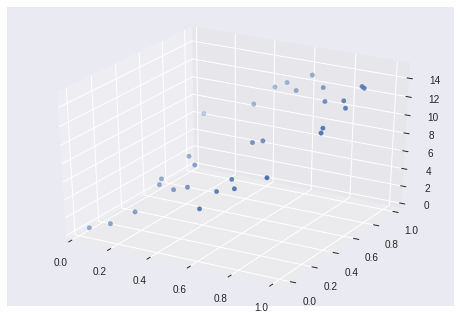

In [19]:
# построим график наших входных данных
# инициализируем новый 3d график
fig = plt.figure()
ax = plt.axes(projection='3d')

# строим точки из исходного набора данных
surf = ax.scatter(X[:,0], X[:,1], z)

# отрисовываем графики
plt.show()

In [0]:
def linear_loss(X, z, omega):
    # Вычислим скалярные произведения для каждого примера:
    tmp1 = np.dot(X, omega)

    # Далее вычтем из этих значений ответы, то есть вектор y
    tmp2 = tmp1 - z

    # Возведем полученные числа в квадрат:
    tmp3 = tmp2 ** 2

    # посчитаем среднее значение, это и есть функция потерь
    loss = np.mean(tmp3)
    
    return loss

def grad_loss_func_analytical(X, z, omega):  
    # аналитическая формула для производной
    N = X.shape[0]
    gradients = 2 * np.dot(np.transpose(X), (np.dot(X, omega) - z)) / N
        
    return gradients
    

    
def gradient_descent(initial_point, X, z, f, grad_f, alpha=0.03, 
                     epsilon=10**-7, max_step=100):
    
    # массивы для хранения пути
    # x_points = []
    # y_points = []
    points = []
    
    # начальная точка
    # cur_x, cur_y = initial_point
    cur_point = initial_point
    cur_step = 0
    
    # сохраняем текущую точку для отображения пути
    # x_points.append(cur_x)
    # y_points.append(cur_y)
    points.append(cur_point)
    
    next_step = True
    while next_step and cur_step < max_step:
        # номер шага
        cur_step += 1
        # на новом шаге текущая точка становится предыдущей
        # previous_x, previous_y = cur_x, cur_y
        previous_point = cur_point
        
        # вычисляем производные
        # dfx, dfy = grad_f(previous_x, previous_y)
        df = grad_f(X, z, previous_point)
        
        # вычиcляем новые точки
        # cur_x = previous_x - alpha * dfx
        # cur_y = previous_y - alpha * dfy
        cur_point = previous_point - alpha * df
        
        # сохраняем текущую точку для отображения пути
        # x_points.append(cur_x)
        # y_points.append(cur_y)
        points.append(cur_point)
        
        #print(abs(f(cur_x, cur_y) - f(previous_x, previous_y)))
        # проеряем критерий остановки
        # if abs(f(cur_x, cur_y) - f(previous_x, previous_y)) < epsilon:
        if abs(f(X, z, cur_point) - f(X, z, previous_point)) < epsilon:
            next_step = False
    return points, cur_step

In [30]:
omega = np.random.random(2)

res, steps = gradient_descent(omega, X_train, y_train, linear_loss, grad_loss_func_analytical)
omega = res[-1]
print(omega, steps)

[8.37585031 7.87415947] 100


In [33]:
def predict(X_test):
    return np.dot(X_test, omega)

print(predict(X_test) - y_test)


[-0.17349197 -0.18431222 -0.15110419 -0.30004785 -0.08637033 -0.05302596
 -0.03725968 -0.03424201 -0.17577469 -0.25468257]


# Визуализация

In [0]:
# точки для визуализации модели
def create_surface_points(X_test, prediction):
    # выделяем кординаты по x и по y для всех точек 
    # строим сетку со всевозможными парами точек
    x_grid, y_grid = np.meshgrid(X_test[:,0], X_test[:,1])


    # разворачиваем матрицы координат в столбцы для предсказаний
    x_row = x_grid.reshape((-1))
    y_row = y_grid.reshape((-1))

    # обединяем в единый набор
    X_grid = np.array([x_row, y_row]).transpose()

    # делаем предсказания
    # surface_prediction = lr.predict(X_grid)
    surface_prediction = prediction(X_grid)
    
    # разбиваем на ряды
    surface_prediction = surface_prediction.reshape(x_grid.shape)
    
    return x_grid, y_grid, surface_prediction

x_grid, y_grid, surface_prediction = create_surface_points(X_test, predict)


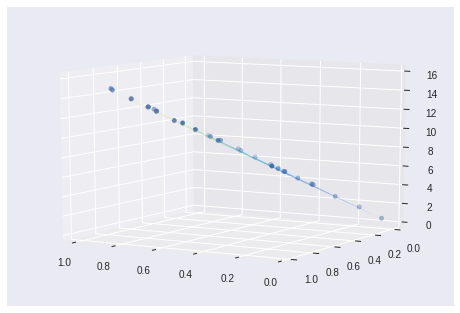

In [39]:
def plot_surface_and_data(X, z, x_grid, y_grid, surface_prediction, angle_1=22, angle_2=20):
    # инициализируем новый 3d график
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    # задаем угол зрения
    ax.view_init(angle_1, angle_2)

    
    # строим точки из исходного набора данных
    surf = ax.scatter(X[:,0], X[:,1], z)
    
    # строим поверхность предсказания
    alpha = 0.03 # прозрачность
    surf = ax.plot_surface(x_grid, y_grid, surface_prediction, cmap='jet',
                            alpha=alpha)
    # отрисовываем графики
    plt.show
    
plot_surface_and_data(X, z, x_grid, y_grid, surface_prediction, angle_1=10, angle_2=120)

# Линейная регрессия
Существуют библиотеки с уже готовыми реализациями алгоритмов машинного обучения. 

In [40]:
from sklearn.linear_model import LinearRegression

# инициализируем объект для линейной регрессии
lr = LinearRegression()

# обучение модели на тренировочной выборке
lr.fit(X_train, y_train)

# предсказание результатов на тестовой выборке
y_predicted = lr.predict(X_test)

# Критерий, чем ближе к единице тем лучше
print("Функция потерь: ", lr.score(X_test, y_test))

# сравним результаты визуально
print(y_predicted)
print(y_test)

Функция потерь:  0.9998755449605753
[11.77102047 13.46593853  9.47176552  7.17303165 11.98812672  0.60153575
 11.42063649 10.14871794  4.40174593  6.44872447]
[11.70778994 13.46502574  9.4608308   7.22093835 12.04288123  0.54138327
 11.43597916 10.14772431  4.46593599  6.47371752]


In [0]:
def generate_dataset_2(N, noise_rate=0.2):
    # сгенирируем случайые параметры a_0 и a_1
    a = np.random.random(2) * 10 
    
    # сгенерируем таблицу входных данных
    X = np.random.random((N,2)) * 5 
    
    # Нелинейное Z
    z = np.dot(np.sin(X),a)
                   
    # добавим небольшой шум
    z += np.random.random(N) * noise_rate 
    return X, z

In [0]:
# сгенерируем входной набор
X, z = generate_dataset_2(40, noise_rate=0)


In [53]:
# доля входных данных, которая будет использоваться для тестов
test_size = 0.2

# разбиваем входной набор на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, z, test_size=0.33, random_state=42) 


# обучение
# инициализируем объект для линейной регрессии
lr = LinearRegression()

# обучение модели на тренировочной выборке
lr.fit(X_train, y_train)

# предсказание результатов на тестовой выборке
y_predicted = lr.predict(X_test)

# Критерий, чем ближе к единице тем лучше
print("Функция потерь: ", lr.score(X_test, y_test))

# сравним результаты визуально
print(y_predicted - y_test)

# точки для визуализации модели
x_grid, y_grid, surface_prediction = create_surface_points(X_test, lr.predict)



Функция потерь:  0.6202104432138316
[-0.8458821   1.6278792   0.98477818  2.88579955  1.22618127 -1.44315264
 -0.79971206 -2.26458952 -0.9489957   4.49572957 -2.98885036  2.06020176
 -2.80142574 -4.80984537]


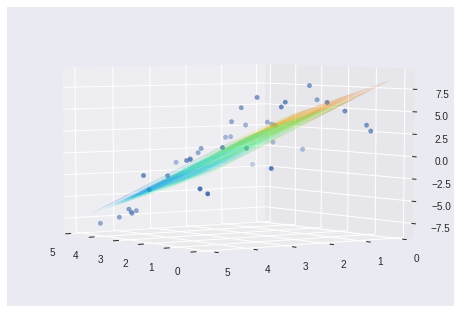

In [52]:
# строим график
plot_surface_and_data(X, z, x_grid, y_grid, surface_prediction, angle_1=5, angle_2=145)


**Основные шаги при решении задач машинного обучения**
1.   Найти или собрать набор входных данных
2.   Обработать данные
3.   Выбрать модель и подходящую функцию потерь
4.   Обучить модель
5.   Донастроить модель (подобрать параметры на основе дополнительной валидационной выборки)
6.   Вернутся на шаг 4 
6.   Profit

